#2021-01-27 Exam - Classification

1. Load the data from the file and show: the first few rows, the output of the .describe() function,
the number of rows and columns (4pt)
2. Since the data contain nulls, eliminate the rows with nulls
3. Since one of the predicting attributes is ordinal, it must be converted into numeric, you can
use the OrdinalEncoder
4. Split the data into train and test
5. Use two classification models of your choice (say: model 1 and model 2) execute the tasks
below
6. Model 1: find and show the best hyperparameter setting with cross validation on the training
set, optimise for the best accuracy
7. Model 1: show the accuracy of classification and the confusion matrix on the test set For the
confusion matrix use plot_confusion_matrix normalized in order to show for each class the
precision (read carefully the documentation)
8. Model 2: find and show the best hyperparameter setting with cross validation on the training
set, optimise for the best accuracy

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = '/content/exam_2021_01_27.csv'
random_state = 42
train_size = 0.67

##1. Load the data from the file and show: the first few rows, the output of the .describe() function, the number of rows and columns (4pt)

In [19]:
df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,a,NaN,0
1,4.9,3.0,a,NaN,0
2,NaN,3.2,a,NaN,0
3,4.6,NaN,a,0.2,0
4,5.0,3.6,a,0.2,0


In [20]:
df.describe()

,0,1,3,4
count,141.000000,140.000000,137.000000,150.000000
mean,5.897872,3.036429,1.290511,1.000000
std,0.820232,0.437654,0.733934,0.819232
min,4.300000,2.000000,0.100000,0.000000
25%,5.200000,2.800000,0.400000,0.000000
50%,5.800000,3.000000,1.400000,1.000000
75%,6.400000,3.300000,1.800000,2.000000
max,7.900000,4.400000,2.500000,2.000000


In [21]:
print('The Dataset contains {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The Dataset contains 150 rows and 5 columns


##2. Since the data contain nulls, eliminate the rows with nulls

In [22]:
df = df.dropna()

##3. Since one of the predicting attributes is ordinal, it must be converted into numeric, you can use the OrdinalEncoder

In [24]:
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings(action='ignore')

oe = OrdinalEncoder(dtype = np.int32)
df[2] = oe.fit_transform(df[2].values.reshape(-1,1))
df

,0,1,2,3,4
4,5.0,3.6,0,0.2,0
7,5.0,3.4,0,0.2,0
10,5.4,3.7,0,0.2,0
11,4.8,3.4,0,0.2,0
13,4.3,3.0,0,0.1,0
...,...,...,...,...,...
145,6.7,3.0,3,2.3,2
146,6.3,2.5,3,1.9,2
147,6.5,3.0,3,2.0,2
148,6.2,3.4,3,2.3,2


##4. Split the data into train and test

In [26]:
from sklearn.model_selection import train_test_split

target = 4
X = df.drop(target, axis=1).copy()
y = df[target]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=random_state, train_size=train_size)
print('The training and testing set have {} and {} elemnts respectively'.format(Xtrain.shape[0], Xtest.shape[0]))

The training and testing set have 81 and 41 elemnts respectively


##5. Use two classification models of your choice (say: model 1 and model 2) execute the tasks below


I will use Decision Tree as Model1 and K-nearest neighbors as Model2

##6. Model 1: find and show the best hyperparameter setting with cross validation on the training set, optimise for the best accuracy

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
dt.fit(Xtrain, ytrain)
y_dt = dt.predict(Xtest)

prev_depth = dt.tree_.max_depth

print('Decision Tree (max_depth: {}) -> accuracy score: {:.2f}%'.format(prev_depth, accuracy_score(ytest, y_dt) * 100))

Decision Tree (max_depth: 4) -> accuracy score: 95.12%


In [36]:
from sklearn.model_selection import GridSearchCV

params_dt = [{'max_depth' : list(np.arange(1,prev_depth+1)), 'random_state' : [random_state]}]

gs = GridSearchCV(estimator=DecisionTreeClassifier()
                  , param_grid=params_dt
                  , refit=True
                  , scoring='accuracy'            # as required
                  , cv=5)

gs.fit(Xtrain, ytrain)
y_dt = gs.predict(Xtest)


##7. Model 1: show the accuracy of classification and the confusion matrix on the test set. For the confusion matrix use plot_confusion_matrix normalized in order to show for each class the precision (read carefully the documentation)

In [37]:
print('Optimized Decision Tree (max_depth: {}) -> accuracy score: {:.2f}%'.format(gs.best_estimator_.tree_.max_depth
                                                                                  , accuracy_score(ytest, y_dt) * 100))

Optimized Decision Tree (max_depth: 4) -> accuracy score: 95.12%


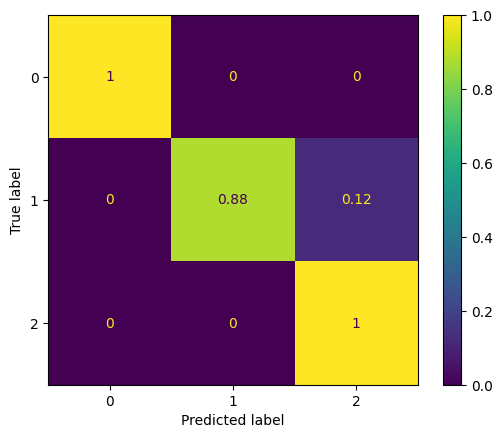

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(ytest, y_dt, normalize='true')
CMD = ConfusionMatrixDisplay(cm)
CMD.plot()

##8. Model 2: find and show the best hyperparameter setting with cross validation on the training set, optimise for the best accuracy

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = [{'n_neighbors' : list(np.arange(1,20))}]

gs = GridSearchCV(estimator=KNeighborsClassifier()
                  , param_grid=knn_params
                  , scoring = 'accuracy')
gs.fit(Xtrain, ytrain)
y_knn = gs.predict(Xtest)

##9. . Model 2: show the accuracy of classification and the confusion matrix on the test set. For the confusion matrix use plot_confusion_matrix normalized in order to show for each class the precision (read carefully the documentation)

In [49]:
print('Optimized K-Nearest Neighbors (k: {}) -> accuracy score: {:.2f}%'.format(gs.best_estimator_.n_neighbors
                                                                                  , accuracy_score(ytest, y_knn) * 100))

Optimized K-Nearest Neighbors (k: 3) -> accuracy score: 90.24%


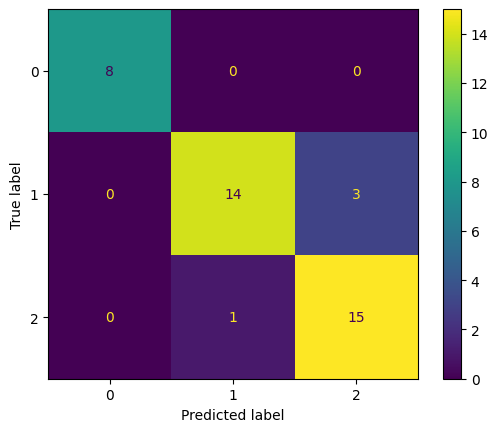

In [53]:
cm = confusion_matrix(ytest, y_knn)
CMD = ConfusionMatrixDisplay(cm)
CMD.plot()